In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install seaborn

In [3]:
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving insurance.xlsx to insurance.xlsx


In [5]:

df =pd.read_excel("insurance.xlsx")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [11]:
df = pd.get_dummies(df, drop_first=True)
#one hot encoding short

In [14]:
df = df.astype(int)#on int
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [15]:
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.169656,1.094918,13269.928999,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.119875,1.205493,12110.012755,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.000000,0.000000,1121.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.000000,0.000000,4740.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.000000,1.000000,9381.500000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.000000,2.000000,16639.250000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.000000,5.000000,63770.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.describe().T #row as column,column as row

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0,27.0,39.0,51.00,64.0
bmi,1338.0,30.169656,6.119875,15.0,26.0,30.0,34.00,53.0
children,1338.0,1.094918,1.205493,0.0,0.0,1.0,2.00,5.0
charges,1338.0,13269.928999,12110.012755,1121.0,4740.0,9381.5,16639.25,63770.0
sex_male,1338.0,0.505232,0.500160,0.0,0.0,1.0,1.00,1.0
smoker_yes,1338.0,0.204783,0.403694,0.0,0.0,0.0,0.00,1.0
region_northwest,1338.0,0.242900,0.428995,0.0,0.0,0.0,0.00,1.0
region_southeast,1338.0,0.272048,0.445181,0.0,0.0,0.0,1.00,1.0
region_southwest,1338.0,0.242900,0.428995,0.0,0.0,0.0,0.00,1.0


# ***Data Visualization***

<Figure size 800x800 with 0 Axes>

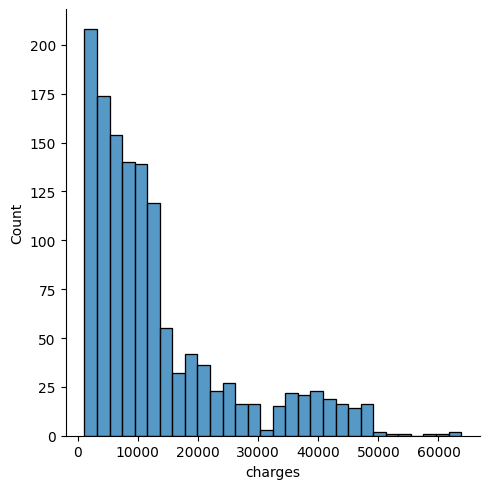

In [18]:
plt.figure(figsize=(8,8))
sns.displot(df['charges'])

<Axes: >

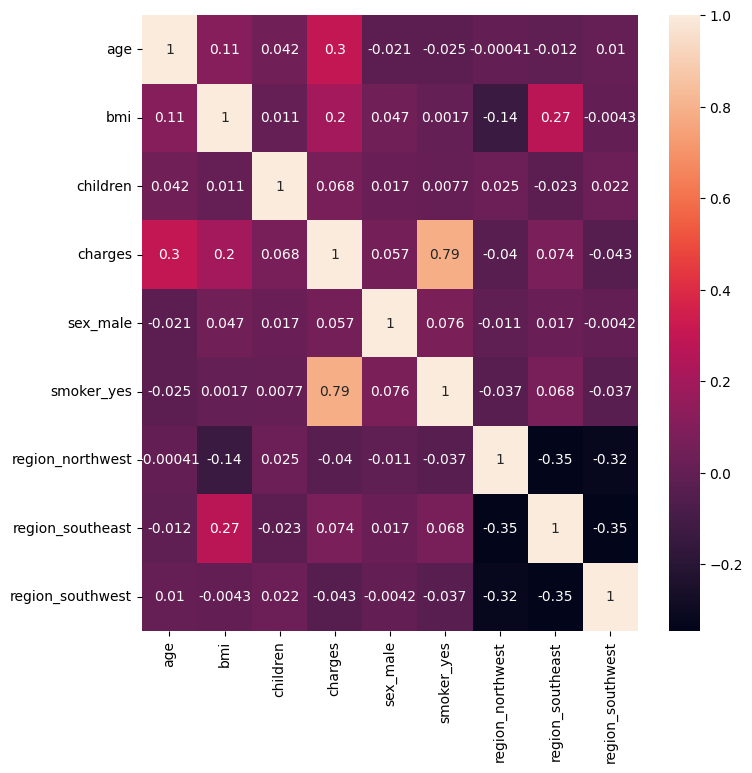

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

# ***TrainTest split***

In [22]:
x = df.drop('charges',axis=1)
y = df['charges']

In [23]:
from sklearn.model_selection import train_test_split as tts #to split the data set to tain the model. "random_state" for data will shuffle in on way. "test_size" how much will train
x_train,x_test,y_train,y_test =tts(x,y,test_size=0.3,random_state= 251)

In [24]:
x_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
686,42,26,2,1,0,0,0,0
552,62,21,0,1,0,0,0,1
824,60,24,0,1,0,1,0,0
1326,42,32,0,0,0,0,0,0
833,58,34,0,1,0,1,0,0


In [26]:
y_train.head()

,charges
686,7729
552,12957
824,12523
1326,7050
833,11743


In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [28]:
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
pred=reg.predict(x_test)
pred

array([15388.71931121, 33101.0794722 , 35117.23617898,  3761.10712649,
       37253.48328461,  3049.68720328, 12704.51734079, 22891.87769449,
       15648.57892786,  1867.7314523 ,  3329.87449178,  5337.41889849,
        6446.18946037, 33005.5365953 , 32762.08012604, 34367.12868532,
       27533.63202091, 33301.2323137 , 12263.58466595,  7919.24341841,
        7351.81256311,  4763.12478745,  7160.50808041, 37184.25130212,
       31350.95410495,  9717.36018904, 33235.52864845,  5717.7651212 ,
       28046.44907767,  -611.74884742, 12825.5123396 ,  3638.13726328,
       32421.9816875 ,  7454.42607233,  8190.62957623, 12467.2658247 ,
       14964.58599096,  6606.31958032,  1742.98955313, 12757.83033216,
       11181.29649925, 12794.51811523,  7274.41776258, 16824.37695378,
       30352.51198935,  5954.39836918, 10759.18874932,  7141.707392  ,
        9941.83437622, 35377.94747697, 30877.09057566, 39620.99901407,
        4747.85241629,  2986.21605214,  7700.75936044, 11658.98910827,
      

# ***Creating dataframe***

In [30]:
df_pred = pd.DataFrame({'Actual' : y_test, 'Prediction': pred ,'Difference': abs(y_test-pred)})

In [31]:
df_pred.head()

,Actual,Prediction,Difference
1166,10982,15388.719311,4406.719311
422,39125,33101.079472,6023.920528
444,26109,35117.236179,9008.236179
3,21984,3761.107126,18222.892874
103,30942,37253.483285,6311.483285


In [32]:
m = reg.coef_ #multiple feature
m

array([ 2.60947357e+02,  3.59796490e+02,  3.70424122e+02, -1.22733804e+02,
        2.35447298e+04, -2.22060908e-01, -1.11168326e+03, -5.23855580e+02])

# *In this case it is best to use label encoding*

In [33]:
c = reg.intercept_
c

np.float64(-12642.722558727439)

In [34]:
  reg.score(x_test,y_test)

0.7621042209660067